Step 1: Import the necessary libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load dataset

In [96]:
# Load dataset
dt = pd.read_csv('titanic.csv')
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Check for Null values

In [97]:
# Check NaN (Dropping or replacing)
print(dt.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Step 4: Data Cleaning

In [98]:
# Data cleaning
dt = dt.drop(columns=['Name', 'Cabin', 'PassengerId'])
dt['Embarked'] = dt['Embarked'].fillna(value=0)
dt['Age'] = dt['Age'].fillna(value=dt['Age'].median())

print(dt.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


Step 5: Ticket Feature engineering

In [99]:
# Making changes to Ticket feature
dt['Group_count'] = dt.groupby('Ticket')['Ticket'].transform('count')
dt = dt.drop(columns=['Ticket'])

Step 6: One Hot Encoding

In [100]:
# One-Hot encoding
dt = pd.get_dummies(dt, drop_first=True)
dt.replace({True: 1, False: 0}, inplace=True)

/var/folders/8_/g5skmwpj36d4g7b3fcvrjccw0000gn/T/ipykernel_71666/3088712453.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt.replace({True: 1, False: 0}, inplace=True)


Step 7: Correlation

             Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived     1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
Pclass      -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
Age         -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
SibSp       -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
Parch        0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
Fare         0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
Group_count  0.038247 -0.002633 -0.218669  0.661622  0.593076  0.345541   
Sex_male    -0.543351  0.131900  0.081163 -0.114631 -0.245489 -0.182333   
Embarked_C   0.168240 -0.243292  0.030248 -0.059528 -0.011069  0.269335   
Embarked_Q   0.003650  0.221009 -0.031415 -0.026354 -0.081228 -0.117216   
Embarked_S  -0.155660  0.081720 -0.014665  0.070941  0.063036 -0.166603   

             Group_count  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived        0.038247 -

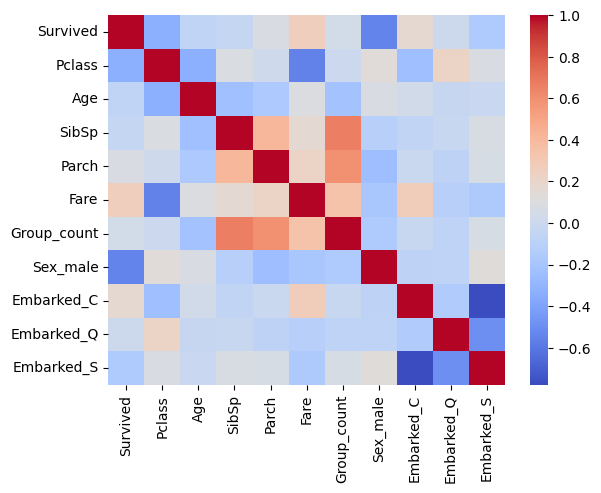

In [101]:

# Correlation heatmap
dt_corr = dt.corr()
print(dt_corr)
sns.heatmap(dt_corr, cmap='coolwarm')
plt.show()

In [102]:
#Sibsp is highly correlated with Group_count
dt = dt.drop(columns=['SibSp'])

Step 8: Standarslisation

In [103]:
# Standardization
scale = ['Age', 'Fare']
for i in scale:
    dt[i] = (dt[i] - dt[i].mean()) / dt[i].std()

Step 9: Data Splitting

In [104]:

# Splitting data
target_column = 'Survived'  # Replace with your actual target variable
shuffled_indices = np.random.permutation(len(dt))
dt_shuffled = dt.iloc[shuffled_indices]

# Define the split ratio
split_ratio = 0.8
split_index = int(len(dt) * split_ratio)

# Split the data
train_data = dt_shuffled.iloc[:split_index]
test_data = dt_shuffled.iloc[split_index:]

# Separate features and target variable
x_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column].values.reshape(-1, 1)  # Reshape for consistency
x_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

# Check sizes
print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 712
Testing set size: 179


Step 10: Logistic Regression model

In [105]:
# Logistic Regression Model Parameters
n_samples, n_features = x_train.shape
weights = np.zeros((n_features, 1))
learning_rate = 0.1
n_iterations = 10000
cost_history = []

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(x, y, weights):
    predictions = sigmoid(np.dot(x, weights))
    cost = -(1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

Step 11: Training

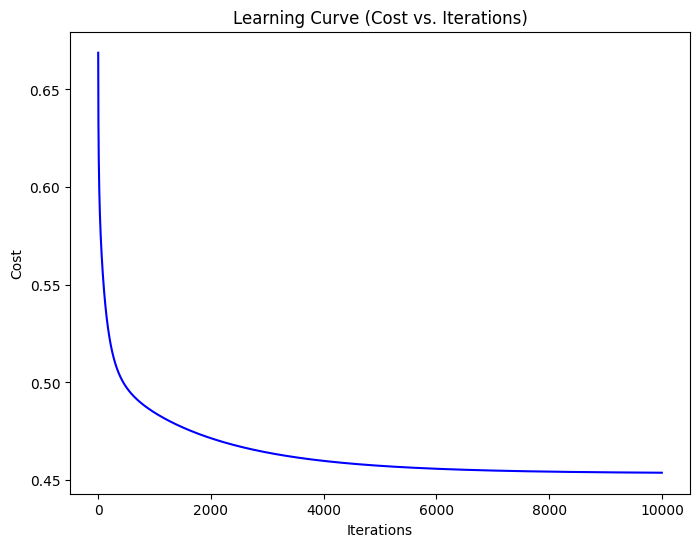

In [106]:
# Training with gradient descent
for i in range(n_iterations):
    predictions = sigmoid(np.dot(x_train, weights))
    gradient = np.dot(x_train.T, (predictions - y_train)) / n_samples
    weights -= learning_rate * gradient
    cost = compute_cost(x_train, y_train, weights)
    cost_history.append(cost)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), cost_history, color='b')
plt.title("Learning Curve (Cost vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Step 12: Testing the learning curve

Accuracy: 79.33%
Precision: 0.76
Recall: 0.69
F1 Score: 0.72
R^2: 0.13
Log Loss: 0.45


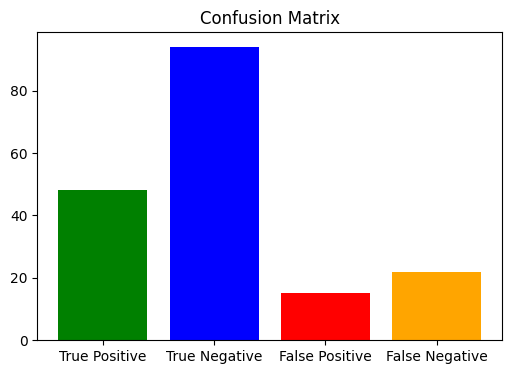

In [107]:
# Prediction function
def predict(x, weights, threshold=0.5):
    return (sigmoid(np.dot(x, weights)) >= threshold).astype(int)

# Evaluate the model on test data
y_pred = predict(x_test, weights)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"R^2: {r2:.2f}")
    print(f"Log Loss: {cost:.2f}")

    # Confusion matrix visualization
    plt.figure(figsize=(6, 4))
    plt.bar(['True Positive', 'True Negative', 'False Positive', 'False Negative'], [tp, tn, fp, fn], color=['green', 'blue', 'red', 'orange'])
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1_score

# Calculate and print metrics on the test set
accuracy, f1_score = calculate_metrics(y_test, y_pred)